In [32]:
%matplotlib inline

## File to barcode



In [41]:
import cv2
import numpy as np
import os
import time
import msvcrt
from matplotlib import pyplot as plt
from subprocess import Popen, PIPE
in_file = r'C:\Data\test\239849-7R_0031\images\170220_134123_239849-7R_0031.jpeg'
barcode_name = 'barcode.tiff'

In [42]:
def do_opening(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,45))
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    plt.imshow(opening,'gray')
    plt.show()
    #cv2.imwrite(barcode_name, 255-opening)

In [43]:
def read_barcode(fpath):
    p = Popen(['zbarimg.exe', '--raw', fpath], stdout=PIPE, stderr=PIPE, stdin=PIPE)
    barcode = p.stdout.read().strip() 
    return barcode

### Read the barcode

In [58]:
def read(image):
    cv2.imwrite(barcode_name, image)
    print read_barcode(barcode_name)

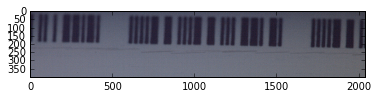

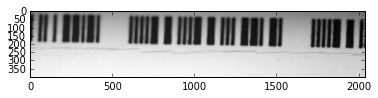

000002


In [97]:
image = cv2.imread(in_file)
image = image[0:400, :, :]
plt.imshow(image)
plt.show()

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#gray = hsv[:,:,2]
#gray = 255 - gray
gray = cv2.medianBlur(gray,7)
#cv2.imwrite(barcode_name, gray)
plt.imshow(gray,'gray')
plt.show()

read(gray)


121 27 86.9424730392


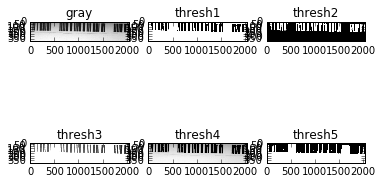

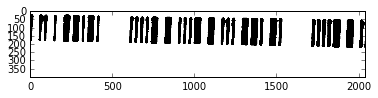

000002


In [130]:
imax = np.max(gray)
imin = np.min(gray)
imean = np.mean(gray)
print imax, imin, imean
threshold = int(imin + (imax - imin) * .3)
ret,thresh1 = cv2.threshold(gray,threshold,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,threshold,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,threshold,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,threshold,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,threshold,255,cv2.THRESH_TOZERO_INV)
ret,thresh5 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh = ['gray','thresh1','thresh2','thresh3','thresh4','thresh5']

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(eval(thresh[i]),'gray')
    plt.title(thresh[i])

plt.show()

plt.imshow(thresh1, 'gray')
plt.show()
read (thresh1)


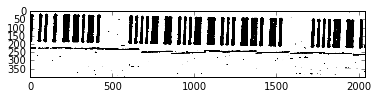

000002


In [125]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,2)
plt.imshow(th3,'gray')
plt.show()
read(th3)

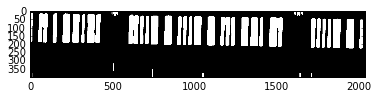

In [61]:
do_opening(255-th3)

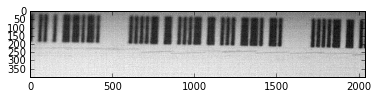

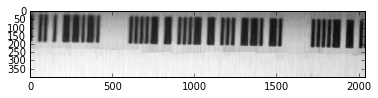

In [66]:
red = image[:,:,0]
#red = 255-red
cv2.imwrite(barcode_name, red)
plt.imshow(red,'gray')
plt.show()
do_opening(red)

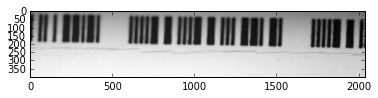

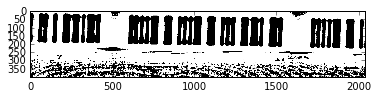

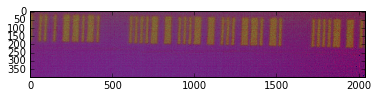

In [63]:

plt.imshow(gray,'gray')
plt.show()
plt.imshow(th3, 'gray')
plt.show()
plt.imshow(hsv[2:], 'gray')
plt.show()

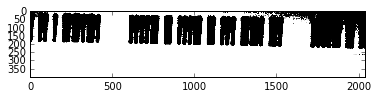

92.0

In [64]:
(thresh, im_bw) = cv2.threshold(hsv[:,:,2], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(im_bw,'gray')
plt.show()
thresh

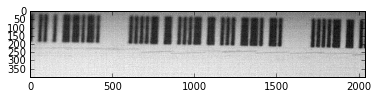

In [65]:
plt.imshow(image[:,:,0],'gray')
plt.show()